In [1]:
import json
import pandas as pd
import numpy as np
import seaborn as sns
import matplotlib.pyplot as plt
from scipy import stats

In [2]:
with open("PopulationNoiseResults_equalPasses2.json", 'r') as pn:
    data = {k:v for k,v in json.load(pn).items() if type(v) is not int}

with open("PopulationNoiseResults_equalPasses1.json", 'r') as pn:
    data.update({k:v for k,v in json.load(pn).items() if type(v) is not int}) # and int(k.split('_')[-1]) in [200, 400, 600, 800, 1000, 1200, 1400, 1600, 1800, 2000]} # and k.split('_')[-1] in ['trial0', '0', '2', '4', '6', '8']}
#print(data.keys())

#print(data.keys())

def str_to_list(in_string):
    temp = in_string[1:-1].split(',')
    return [int(s) for s in temp]

score_num = 1
df = pd.DataFrame()
stats = {}
stats_combined = {}
for t,d in data.items():
    stats[t] = {}
    acc = d["accs"]
    
    scores = list(acc.values())
    scores = np.vstack([np.array(s) for s in scores])[score_num]
    
    stats[t]["medians"] = np.median(scores)
    stats[t]["iqr"] = np.quantile(scores, 0.75) - np.quantile(scores, 0.25)
    data[t] = d
    
    d["train"] = d["accs"]["train"]
    d["val"] = d["accs"]["val"]
    
    d["population"] = int(t.split("trial")[-1].split('_')[0])
    d["passes"] = int(t.split("trial")[-1].split('_')[1])
    
    stats[t]["population"] = d["population"]
    stats[t]["passes"] = d["passes"]
    
    stats_combined[t[:-2]] = stats_combined.get(t[:-2], {})
    stats_combined[t[:-2]]["population"] = d["population"]
    stats_combined[t[:-2]]["passes"] = d["passes"]
    stats_combined[t[:-2]]["accs"] = stats_combined[t[:-2]].get("accs", []) + list(scores)
    del d["accs"]
    del d["shape"]
    
    temp_df =  pd.DataFrame.from_dict(d, orient = "columns")
    df = pd.concat([df, temp_df], ignore_index = True)
    
for k,v in stats_combined.items():
    v["medians"] = np.median(v["accs"])
    v["iqr"] = np.quantile(v["accs"], 0.75) - np.quantile(v["accs"], 0.25)
    v["samples"] = len(v["accs"])
    del v["accs"]

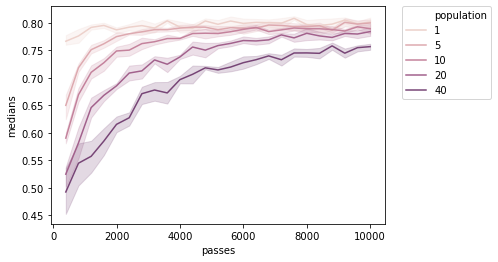

In [3]:
combo_df = pd.DataFrame.from_dict(stats, orient = "index")
sns.lineplot(x="passes", y = "medians", hue = "population", data = combo_df, legend = "full", palette = sns.color_palette("ch:dark=0.35", 5))
plt.legend(bbox_to_anchor=(1.05, 1), loc='upper left', borderaxespad=0.)
#plt.ylim([0.02,0.06])

(0.02, 0.15)

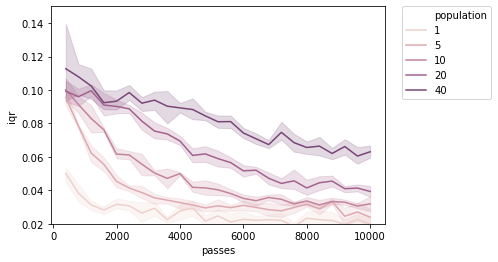

In [4]:
combo_df = pd.DataFrame.from_dict(stats, orient = "index")
sns.lineplot(x="passes", y = "iqr", hue = "population", data = combo_df, legend = "full", palette = sns.color_palette("ch:dark=0.35", 5))
plt.legend(bbox_to_anchor=(1.05, 1), loc='upper left', borderaxespad=0.)
plt.ylim([0.02, 0.15])